# Basic FULMAR usage. Using K2-109 as an example
This system contains two known exoplanets. For more information, have a look at [Barros et al. 2017](https://www.aanda.org/articles/aa/pdf/2017/12/aa31276-17.pdf)

Let's start by importing common modules

In [1]:
import fulmar
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from transitleastsquares import cleaned_array, transitleastsquares, transit_mask

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Functions to plot tls results. To be included in the module in a later version

In [2]:
def perioplot(tls_results, target, folder, num, maxper=None, savefig=False):
    if maxper is None:
        maxper = np.max(tls_results.periods)
    plt.figure()
    ax = plt.gca()
    ax.axvline(tls_results.period, alpha=0.4, lw=3, color='xkcd:green')
    plt.xlim(np.min(tls_results.periods), maxper)
    for n in range(2, 20):
        ax.axvline(n * tls_results.period, alpha=0.4, lw=1,
                   linestyle="dashed", color='xkcd:green')
    for n in range(2, int(tls_results.period / min(tls_results.periods))):
        ax.axvline(tls_results.period / n, alpha=0.4, lw=1,
                   linestyle="dashed", color='xkcd:green')
    plt.ylabel(r'SDE')
    plt.title(target)
    plt.xlabel('Period (days)')
    plt.annotate("best period = {0:.5f} days".format(tls_results.period), (.02, .02),
            xycoords="axes fraction",
            fontsize=12)
    ax.plot(tls_results.periods, tls_results.power, color='black', lw=0.5)
    plt.xlim(0, maxper)
    plt.tight_layout()
    if savefig is True:
        plt.savefig(
            folder + 'tls_periodogram_{n}_{Pmax}_days'.format(n=num,Pmax=int(maxper)), facecolor='white', dpi=240)
    plt.show()

def modelplot(tls_results, xlim=(0.48, 0.52)):
    plt.figure()
    plt.plot(tls_results.model_folded_phase,
             tls_results.model_folded_model, color='xkcd:green')
    plt.scatter(tls_results.folded_phase, tls_results.folded_y,
                color='xkcd:charcoal', s=10, alpha=0.5, zorder=2)
    plt.xlim(xlim[0], xlim[1])
    plt.xlabel('Phase')
    plt.ylabel('Relative flux')
    plt.show()

# Define target

In [3]:
lc_targ = fulmar.target('K2-109') # aka. HD 106315 

In [4]:
lc_targ.R_star

array(1.27)

In [5]:
lc_targ.mission

'K2'

## Update stellar parameters if necessary

In [4]:
# K2-109 parameters from Barros et al. 2017 (https://www.aanda.org/articles/aa/pdf/2017/12/aa31276-17.pdf)
lc_targ.R_star = 1.296
lc_targ.R_star_max = 0.058
lc_targ.R_star_min = 0.058

lc_targ.M_star = 1.091
lc_targ.M_star_max = 0.036
lc_targ.M_star_min = 0.036

# Build the lightcurve

In [5]:
lc_targ.build_lightcurve(author='EVEREST')

['K2 Campaign 102']


time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06
,,,,electron / s,,electron / s,,electron / s,,,,,,
object,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.9919362273818925,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682
2749.6103854284593,0.9919057528017547,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284
2749.6308173623256,0.9920318018415252,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527
2749.6512491959584,0.9919802015869569,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964
2749.6716812293525,0.992301349055998,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415
2749.6921131622876,0.9923487483914822,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642
2749.712544994756,0.9923954335698577,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Alternatively, build the lightcurve from files, for example data reduced with POLAR

In [ ]:
filelist = [your_files_here]

In [ ]:
lc_targ.build_lightcurve(filelist=filelist, author='AUTHOR')

## Plot the light curve for a quick visualisation

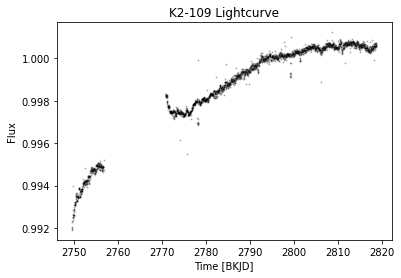

In [6]:
plt.plot(lc_targ.ts_stitch.time.value, lc_targ.ts_stitch['flux'],'k.', markersize=1.8, alpha = 0.25)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
plt.title(lc_targ.K2 + ' Lightcurve')
# plt.xlim(2350,2356)
# plt.ylim(0.9985,1.0015)
plt.show()

## Mask Outliers

In [7]:
m1 = lc_targ.mask_outliers(sigma=4)

### Plot the light curve with outliers highlighted

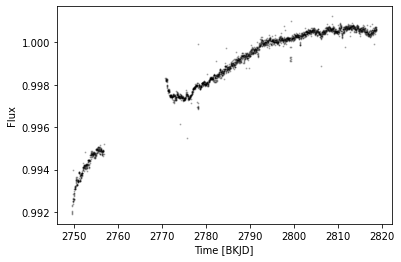

In [8]:
plt.plot(lc_targ.ts_stitch.time.value, lc_targ.ts_stitch['flux'],'k.', markersize=1.8, alpha = 0.25)
plt.plot(lc_targ.ts_stitch.time.value[~m1], lc_targ.ts_stitch['flux'][~m1],'o', color='xkcd:orange', markersize=1.8, alpha = 0.5)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
# plt.xlim(2350,2356)
# plt.ylim(0.985,1.015)
plt.show()

### Remove the outliers if necessary.

In [49]:
lc_targ.ts_stitch = lc_targ.ts_stitch[m1]

# Clean the light curve / correct activity

## Using a Savistzky-Golay filter:

In [10]:
lc_targ.clean_subt_activity_flatten(sigma=3,
        wl=37,
        time_window=18*u.h,
        polyorder=2,
        return_trend=False,
        remove_outliers=True,
        break_tolerance=5,
        niters=3,
        mask=None)

# You might face issues with Astropy >= 5.0 where flatten gives TypeError: "cannot write to unmasked output"
# The issue comes from Lightkurve and a pull request has been made: https://github.com/lightkurve/lightkurve/pull/1162/commits/05034f4bbd8e6a40f8efd9cfa1f108a36ddc0872

time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06
,,,,electron / s,,electron / s,,electron / s,,,,,,
object,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.9974501540805712,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682
2749.6103854284593,0.9974560214192083,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284
2749.6308173623256,0.9976192942270874,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527
2749.6512491959584,0.9976039223887216,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964
2749.6716812293525,0.9979634244054806,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415
2749.6921131622876,0.9980476323452525,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642
2749.712544994756,0.9981311279867419,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
m_fix=np.full_like(lc_targ.ts_stitch.time.value, False, dtype=bool)
m_fix[0]=True # make the first point invalid

lc_targ.clean_subt_activity_flatten(sigma=3,
        wl=701,
        polyorder=2,
        return_trend=False,
        remove_outliers=True,
        break_tolerance=5,
        niters=3,
        mask=m_fix)

# You might face issues with Astropy >= 5.0 where flatten gives TypeError: "cannot write to unmasked output"
# The issue comes from Lightkurve and a pull request has been made: https://github.com/lightkurve/lightkurve/pull/1162/commits/05034f4bbd8e6a40f8efd9cfa1f108a36ddc0872

time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06
,,,,electron / s,,electron / s,,electron / s,,,,,,
object,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.9974501540805712,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682
2749.6103854284593,0.9974560214192083,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284
2749.6308173623256,0.9976192942270874,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527
2749.6512491959584,0.9976039223887216,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964
2749.6716812293525,0.9979634244054806,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415
2749.6921131622876,0.9980476323452525,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642
2749.712544994756,0.9981311279867419,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Alternatively, using GP: 

In [14]:
lc_targ.clean_subt_activity_GP(
            timeseries=None,
            bin_duration=60 * u.min,
            period_min=0.2,
            period_max=100.0,
            tune=2500,
            draws=2500,
            chains=2,
            target_accept=0.95,
            ncores=None,
            return_trend=False,
            remove_outliers=True,
            sigma_out=3,
            mask=None)

 /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/astropy/timeseries/downsample.py:26: RuntimeWarning: Mean of empty slice /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice

guessed period is 24.03185320009876 days


optimizing logp for variables: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: -399.1421996436145 -> 3045.716929324343
Multiprocess sampling (2 chains in 8 jobs)
NUTS: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


Sampling 2 chains for 2_500 tune and 2_500 draw iterations (5_000 + 5_000 draws total) took 82 seconds.


time,flux,flux_err,cadn,fraw,cadenceno,fraw_err,quality,fcor,cbv01,cbv02,cbv03,cbv04,cbv05,cbv06
,,,,electron / s,,electron / s,,electron / s,,,,,,
object,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64
2749.5899533941338,0.9987751683656436,nan,129231.0,3616934.469760895,129231.0,47.413345756122425,524288,3618895.8239213014,1.0,4.032601813062183,3.721325487340294,-0.6272998722503135,2.7580352239694506,0.9449693607767682
2749.6103854284593,0.9987444836773868,nan,129232.0,3616898.694656372,129232.0,47.4206060553783,0,3618797.79577493,1.0,4.036445303100602,3.709970058424757,-0.639482652969744,2.7337745018705517,0.9413711769034284
2749.6308173623256,0.9988714017669209,nan,129233.0,3617448.0032958984,129233.0,47.43482627636655,0,3619268.647123106,1.0,4.040263871939855,3.698637940508874,-0.6516019999249221,2.7095909556591535,0.9377823016121527
2749.6512491959584,0.9988134829675017,nan,129234.0,3617286.1815719604,129234.0,47.44625835297297,0,3619093.66213457,1.0,4.044057555765272,3.687329095681801,-0.6636580207756357,2.685484485807006,0.9342027182885964
2749.6716812293525,0.9991306340523651,nan,129235.0,3618496.683452606,129235.0,47.469152065594365,0,3620273.5298203984,1.0,4.047826390762182,3.676043486032692,-0.6756508231816731,2.6614549927858597,0.930632410318415
2749.6921131622876,0.9991721507971003,nan,129236.0,3618750.0302505493,129236.0,47.48211093867445,0,3620458.2428743644,1.0,4.051570413115917,3.664781073650703,-0.6875805148028225,2.6375023770674657,0.9270713610872642
2749.712544994756,0.9992129479932125,nan,129237.0,3618955.9937667847,129237.0,47.49448540389917,0,3620640.277803066,1.0,4.055289659011805,3.6535418206249886,-0.6994472032988717,2.613626539123574,0.9235195539807992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Plot the corrected light curve

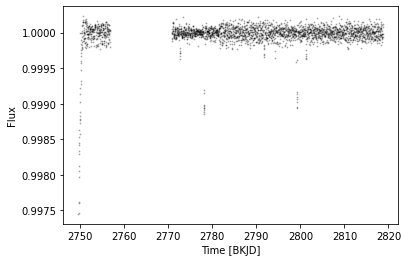

In [11]:
plt.plot(lc_targ.ts_clean.time.value, lc_targ.ts_clean['flux'],'k.', markersize=1.8, alpha = 0.25)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
# plt.xlim(2350,2356)
# plt.ylim(0.985,1.015)
plt.show()

### Looks like there's something wrong at the begginning of our data. For now, lets mask it out.

In [12]:
debut_mask = np.array(lc_targ.ts_clean.time.value < 2752.5)
# np.where(debut_mask)

# Look for transits using TLS

## Look for the first exoplanet

In [13]:
perio_results1 = lc_targ.tls_periodogram(cleaned=True, n_transits_min=2, mask=debut_mask)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 44 durations
Searching 2342 data points, 6881 periods from 0.602 to 33.099 days
Using all 8 CPU threads


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6881/6881 periods | 00:09<00:00


Searching for best T0 for period 21.06392 days


 /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/transitleastsquares/main.py:411: UserWarning: 1 of 3 transits without data. The true period may be twice the given period.

### Plot the TLS periodogram 

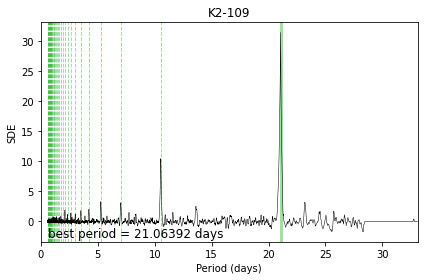

In [14]:
perioplot(perio_results1, lc_targ.K2, folder="K2-109/", num=1, maxper=None, savefig=False)
# perioplot(results, lc_targ.K2, folder="K2-109/", num=1, maxper=50, savefig=False)

### Plot the resulting model to have a quick visual check

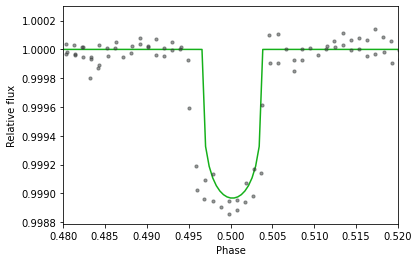

In [16]:
modelplot(lc_targ.tls_results)

### Optimize the transit parameters. **_Be careful it assumes circular orbit_**

In [17]:
from fulmar import time_flux_err
import multiprocessing
import exoplanet as xo
def params_optimizer(timeseries, period_guess, t0_guess, depth_guess, ab, r_star, target_id, tran_window=0.25, ncores=None, mask=None):
    if ncores is None:
        ncores = multiprocessing.cpu_count()
    print('running on {} cores'.format(ncores))
#     x = ts_stitch.time.value
#     y = ts_stitch[flux_kw + '_clean'].value
#     yerr = ts_stitch[flux_err_kw+'_clean'].value
        
    if mask is not None:
        x, y, yerr = time_flux_err(timeseries[mask])
        
    x, y, yerr = time_flux_err(timeseries)

    # x = time.copy()
    # y = flux.copy()
    # yerr = flux_err.copy()

    transitMask = (np.abs(
        (x - t0_guess + 0.5 * period_guess) % period_guess - 0.5 * period_guess) < tran_window)
    x = np.ascontiguousarray(x[transitMask])
    y = np.ascontiguousarray(y[transitMask]) - 1
    yerr = np.ascontiguousarray(yerr[transitMask])


#     plt.figure(figsize=(8, 4))
#     x_fold = (
#         x - t0_guess + 0.5 * period_guess
#     ) % period_guess - 0.5 * period_guess
#     plt.scatter(x_fold, y, c=x, s=3)
#     plt.xlabel("time since transit [days]")
#     plt.ylabel("relative flux [ppt]")
#     plt.colorbar(label="time [days]")
#     _ = plt.xlim(-tran_window, tran_window)

    import pymc3 as pm
    import aesara_theano_fallback.tensor as tt

    import pymc3_ext as pmx
#     from celerite2.theano import terms, GaussianProcess

    with pm.Model() as model:

        # Stellar parameters
        mean = pm.Normal("mean", mu=0.0, sigma=10.0)
#         u = xo.distributions.QuadLimbDark("u", testval=np.array(ab))
#         star_params = [mean, u]
        u = ab
        star_params = [mean]

        # Planet parameters
        log_ror = pm.Normal(
            "log_ror", mu=0.5 * np.log(depth_guess), sigma=10.0
        )
        ror = pm.Deterministic("ror", tt.exp(log_ror))
        r_pl = pm.Deterministic("r_pl", ror * r_star)
        # Orbital parameters
        log_period = pm.Normal(
            "log_period", mu=np.log(period_guess), sigma=1.0)
        period = pm.Deterministic("period", tt.exp(log_period))
        t0 = pm.Normal("t0", mu=t0_guess, sigma=1.0)
        log_dur = pm.Normal("log_dur", mu=np.log(0.06), sigma=10.0)
        dur = pm.Deterministic("dur", tt.exp(log_dur))
        b = xo.distributions.ImpactParameter("b", ror=ror)

        # Set up the orbit
        orbit = xo.orbits.KeplerianOrbit(
            period=period, duration=dur, ror=ror, t0=t0, b=b)

        # We're going to track the implied density
        pm.Deterministic("rho_circ", orbit.rho_star)

        # Set up the mean transit model
        light_curves = xo.LimbDarkLightCurve(
            u).get_light_curve(orbit=orbit, r=ror, t=x)

        light_curve = pm.math.sum(light_curves, axis=-1) + mean

        # Here we track the value of the model light curve for plotting
        # purposes
        pm.Deterministic("light_curves", light_curves)

        # Finally the GP observation model
    #     gp = GaussianProcess(
    #         kernel, t=x, diag=yerr ** 2 + sigma ** 2, mean=lc_model
    #     )
    #     gp.marginal("obs", observed=y)
    #     pm.Deterministic("gp_pred", gp.predict(y))

        pm.Normal("obs", mu=light_curve, sd=np.median(yerr), observed=y)

        # Double check that everything looks good - we shouldn't see any NaNs!
        print(model.check_test_point())

        # Optimize the model
        map_soln = model.test_point

        map_soln = pmx.optimize(map_soln, [ror, b, dur])

        map_soln = pmx.optimize(map_soln, star_params)
        map_soln = pmx.optimize(map_soln)
        map_soln = pmx.optimize()


#         plt.figure(figsize=(9, 5))
#         x_fold = (x - map_soln["t0"] + 0.5 * map_soln["period"]) % map_soln[
#             "period"
#         ] - 0.5 * map_soln["period"]
#         inds = np.argsort(x_fold)
#         plt.scatter(x_fold, 1 + y - map_soln["mean"], c=x, s=3)
#         plt.plot(x_fold[inds], 1 + map_soln["light_curves"][inds] - map_soln["mean"], "k")
#         plt.xlabel("time since transit [days]")
#         plt.ylabel("relative flux [ppt]")
#         plt.colorbar(label="time [days]")
#         _ = plt.xlim(-tran_window, tran_window)
#         plt.show()

        np.random.seed()
        with model:
            trace = pmx.sample(
                tune=2500,
                draws=2000,
                start=map_soln,
                chains=2,
                cores=ncores,
                target_accept=0.96,
                return_inferencedata=True,
            )

        import arviz as az
        az.summary(trace,
                   var_names=[
                       "period",
                       "t0",
                       "ror",
                       'dur',
                       'b',
                       #                     "u",
                       "mean"
                   ],)

        flat_samps = trace.posterior.stack(sample=("chain", "draw"))
        p = np.median(flat_samps["period"])
        t0 = np.median(flat_samps["t0"])
        dur = np.median(flat_samps["dur"])
        depth = np.median(flat_samps['ror'])**2
#         ab = tuple((np.median(flat_samps['u'], axis=-1)))

        # Plot the folded data
        x_fold = (x - t0 + 0.5 * p) % p - 0.5 * p
        plt.plot(x_fold, 1 + y, ".k", alpha=0.4, label="data", zorder=-1000)

        # Overplot the phase binned light curve
        bins = np.linspace(-0.41, 0.41, 50)
        denom, _ = np.histogram(x_fold, bins)
        num, _ = np.histogram(x_fold, bins, weights=y)
        denom[num == 0] = 1.0
        plt.plot(
            0.5 * (bins[1:] + bins[:-1]), 1 + num / denom, "o", color="C1", label="binned", alpha=0.7
        )

        # Plot the folded model
        inds = np.argsort(x_fold)
        inds = inds[np.abs(x_fold)[inds] < 0.3]
        pred = np.percentile(
            flat_samps["light_curves"][inds, 0], [16, 50, 84], axis=-1
        )
        plt.plot(x_fold[inds], 1 + pred[1], color="xkcd:green", label="model")
        art = plt.fill_between(
            x_fold[inds], 1 + pred[0], 1 + pred[2], color="xkcd:green", alpha=0.2, zorder=1000
        )
        art.set_edgecolor("none")

        # Annotate the plot with the planet's period
        txt = "period = {0:.5f} +/- {1:.5f} d".format(
            np.mean(flat_samps["period"].values), np.std(
                flat_samps["period"].values)
        )
        plt.annotate(
            txt,
            (0, 0),
            xycoords="axes fraction",
            xytext=(5, 5),
            textcoords="offset points",
            ha="left",
            va="bottom",
            fontsize=12,
        )

        plt.legend(fontsize=10, loc=4)
        plt.title(target_id)
        plt.xlim(-0.5 * p, 0.5 * p)
        plt.xlabel("time since transit [days]")
        plt.ylabel("de-trended flux")
        _ = plt.xlim(-tran_window, tran_window)
        plt.show()

        return p, t0, dur, depth, ab, flat_samps

running on 8 cores
mean           -3.22
log_ror        -3.22
log_period     -0.92
t0             -0.92
log_dur        -3.22
b_impact__     -1.39
obs           215.39
Name: Log-probability of test_point, dtype: float64


optimizing logp for variables: [log_dur, b, log_ror]


message: Optimization terminated successfully.
logp: 202.50080243937342 -> 329.84920538031037
optimizing logp for variables: [mean]


message: Optimization terminated successfully.
logp: 329.84920538031037 -> 329.9372911544024
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 329.9372911544024 -> 335.29510909428654
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 202.50080243937342 -> 335.295109094289
Multiprocess sampling (2 chains in 8 jobs)
NUTS: [b, log_dur, t0, log_period, log_ror, mean]


Sampling 2 chains for 2_500 tune and 2_000 draw iterations (5_000 + 4_000 draws total) took 41 seconds.
The number of effective samples is smaller than 25% for some parameters.


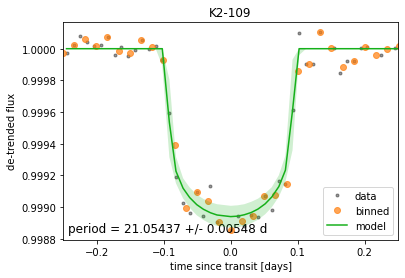

In [18]:
p, t0, dur, depth, ab, flat_samps = params_optimizer(lc_targ.ts_clean, lc_targ.tls_results.period, lc_targ.tls_results.T0, 1-lc_targ.tls_results.depth, lc_targ.ab, lc_targ.R_star, lc_targ.K2, tran_window=0.25, ncores=None, mask=None)

### Mask intransit data

In [30]:
intransit = transit_mask(lc_targ.ts_clean.time.value, p, 1.3*dur, t0) # True when datapoints are in transit

#### Combine intransit mask with the initial mask

In [31]:
p1_mask = np.logical_or(debut_mask, intransit)

### Plot the lightcurve with transits highlighted

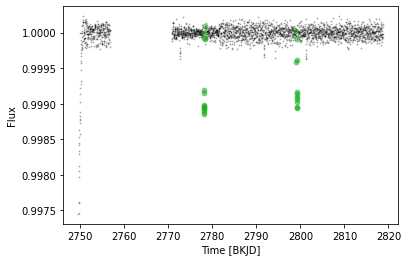

In [32]:
plt.plot(lc_targ.ts_clean.time.value, lc_targ.ts_clean['flux'],'k.', markersize=1.8, alpha = 0.25)
plt.plot(lc_targ.ts_clean.time.value[intransit], lc_targ.ts_clean['flux'][intransit],'o', color='xkcd:green', markersize=4.8, alpha = 0.5)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
#plt.xlim(2749,2752)
# plt.ylim(0.985,1.015)
plt.show()

## Look for the second exoplanet

In [33]:
perio_results2 = lc_targ.tls_periodogram(cleaned=True, n_transits_min=2, period_min=0.9, mask=p1_mask) 

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 44 durations
Searching 2318 data points, 5707 periods from 0.9 to 33.099 days
Using all 8 CPU threads


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5707/5707 periods | 00:07<00:00


Searching for best T0 for period 9.55586 days


### Plot the TLS periodogram 

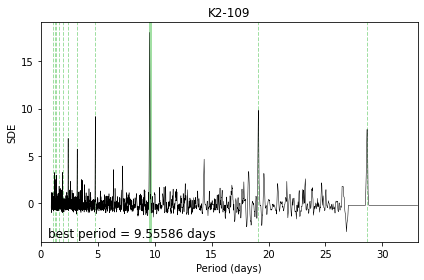

In [34]:
perioplot(perio_results2, lc_targ.K2, folder="K2-109/", num=2, maxper=None, savefig=False)
# perioplot(results, lc_targ.K2, folder="K2-109/", num=1, maxper=50, savefig=False)

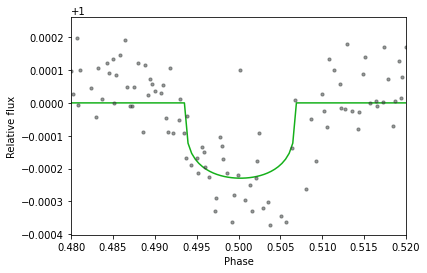

In [35]:
modelplot(lc_targ.tls_results)

### Visualize where the transits lay in the lightcurve

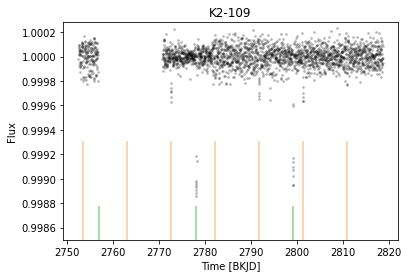

In [59]:
plt.plot(lc_targ.ts_clean.time.value[~debut_mask], lc_targ.ts_clean['flux'][~debut_mask],'ko', markersize=1.8, alpha = 0.2)

plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
#plt.xlim(2749,2752)
# plt.ylim(0.985,1.015)

for n in perio_results1.transit_times:
    plt.axvline(n, alpha=0.4, lw=2, ymax=0.15, color='xkcd:green')
for n in perio_results2.transit_times:
    plt.axvline(n, alpha=0.3, lw=2, ymax=0.45, color='xkcd:orange')

plt.title(lc_targ.K2)

plt.ylim(0.9985,1.00028)
plt.show()

### Optimize the transit parameters. **_Be careful it still assumes circular orbit_**

running on 8 cores
mean           -3.22
log_ror        -3.22
log_period     -0.92
t0             -0.92
log_dur        -3.22
b_impact__     -1.39
obs           958.91
Name: Log-probability of test_point, dtype: float64


optimizing logp for variables: [log_dur, b, log_ror]


message: Optimization terminated successfully.
logp: 946.0179505760326 -> 955.2021987096035
optimizing logp for variables: [mean]


message: Optimization terminated successfully.
logp: 955.2021987096035 -> 955.8942120351049
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 955.8942120351049 -> 956.1757437099852
optimizing logp for variables: [b, log_dur, t0, log_period, log_ror, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 946.0179505760326 -> 949.7692381523063
Multiprocess sampling (2 chains in 8 jobs)
NUTS: [b, log_dur, t0, log_period, log_ror, mean]


Sampling 2 chains for 2_500 tune and 2_000 draw iterations (5_000 + 4_000 draws total) took 78 seconds.
The number of effective samples is smaller than 25% for some parameters.


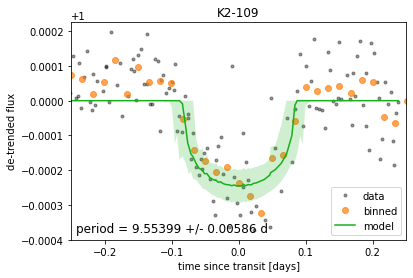

In [60]:
p_1, t0_1, dur_1, depth_1, ab_1, flat_samps_1 = params_optimizer(lc_targ.ts_clean, lc_targ.tls_results.period, lc_targ.tls_results.T0, 1-lc_targ.tls_results.depth, lc_targ.ab, lc_targ.R_star, lc_targ.K2, tran_window=0.25, ncores=None, mask=~p1_mask)

### Mask intransit data

In [61]:
intransit2 = transit_mask(lc_targ.ts_clean.time.value, p_1, 1.3*dur_1, t0_1) # True when datapoints are in transit

#### Combine intransit mask with the initial mask

In [62]:
p2_mask = np.logical_or(p1_mask, intransit2)

### Plot the lightcurve with transits highlighted

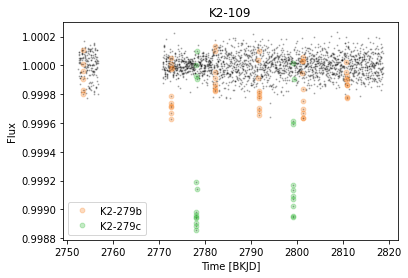

In [75]:
plt.plot(lc_targ.ts_clean.time.value[~debut_mask], lc_targ.ts_clean['flux'][~debut_mask],'k.', markersize=1.8, alpha = 0.25)
plt.plot(lc_targ.ts_clean.time.value[intransit2], lc_targ.ts_clean['flux'][intransit2],'o', color='xkcd:orange', markersize=4.8, alpha = 0.25, label='K2-279b')
plt.plot(lc_targ.ts_clean.time.value[intransit], lc_targ.ts_clean['flux'][intransit],'o', color='xkcd:green', markersize=4.8, alpha = 0.25, label='K2-279c')


plt.xlabel('Time [{}]'.format(str(lc_targ.ts_stitch.time.format).upper()))
plt.ylabel('Flux')
#plt.xlim(2749,2752)
# plt.ylim(0.985,1.015)
plt.title(lc_targ.K2)
plt.legend()
plt.show()

## Look for a possible third exoplanet ?

In [76]:
perio_results3 = lc_targ.tls_periodogram(cleaned=True, n_transits_min=2, mask=p2_mask)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 44 durations
Searching 2265 data points, 6881 periods from 0.602 to 33.099 days
Using all 8 CPU threads


100%|████████████████████████████████████████████████████████████████████████████████████████████| 6881/6881 periods | 00:06<00:00
 /home/jrodrigues/fulmar_venv/lib64/python3.9/site-packages/transitleastsquares/stats.py:458: RuntimeWarning: divide by zero encountered in double_scalars

Searching for best T0 for period 12.50044 days


### Plot the TLS periodogram 

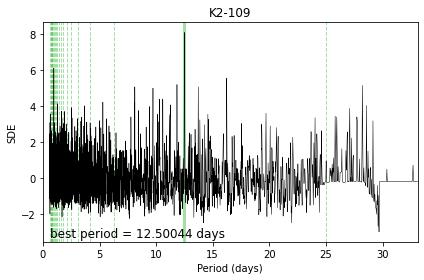

In [77]:
perioplot(perio_results3, lc_targ.K2, folder="K2-109/", num=3, maxper=None, savefig=False)
# perioplot(results, lc_targ.K2, folder="K2-109/", num=1, maxper=50, savefig=False)

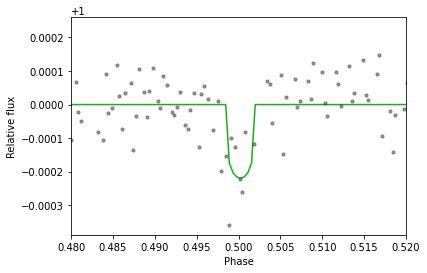

In [78]:
modelplot(lc_targ.tls_results)

In [79]:
perio_results3.SDE, perio_results3.FAP

(8.095668315624327, 0.001280512)

**SDE < 9**, which is the normally accepted threshold for a detection. We can end it there, as we can assume the system only contains two planets.